<a href="https://colab.research.google.com/github/lojanee/AUC-Fundamentals-of-Data-Science-II-Spring-2023/blob/main/Lojane_Ahmed_glioma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Glioma

In [1]:
import pandas as pd # Import the pandas package using the alias 'pd'
import seaborn as sns # Import the seaborn package using the alias 'sns'

In [2]:
df = pd.read_table("https://raw.githubusercontent.com/ahmedmoustafa/glioma/main/glioma.tsv") # Read and load the tsv data file into a DataFrame
df.shape

(839, 10)

In [3]:
df.head()

,ID,Grade,Gender,Age_at_diagnosis,Sex,TP53,PTEN,EGFR,NF1,NOTCH1
0,1,0,0,51.30,0,0,0,0,0,0
1,2,0,0,38.72,0,0,0,0,0,0
2,3,0,0,35.17,0,1,0,0,0,0
3,4,0,1,32.78,0,1,0,0,0,0
4,5,0,0,31.51,0,1,0,0,0,0


---
**Q1: What is the median age at diagnosis for both Glioblastoma Multiforme (GBM) and Low-Grade Glioma (LGG)? (5 points numerical answer + 5 points graphical answer)**

Median age is calculated by adding all "ages_at_diagnosis" together and dividing it by 839 compared to the grade, after obtaining the median age. we plotted the grade compared to the age at diagnosis and this resulted that the GMB take more age to diagnose than the LGG. 

In [16]:
median_age=df.groupby('Grade')['Age_at_diagnosis'].median()

In [17]:
print(median_age)

Grade
0    41.610
1    61.395
Name: Age_at_diagnosis, dtype: float64


In [18]:
sns.set_style("whitegrid")

<Axes: xlabel='Grade', ylabel='Age_at_diagnosis'>

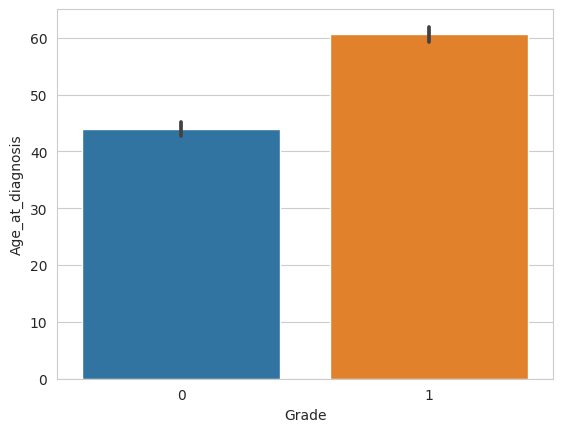

In [19]:
sns.barplot(x='Grade', y='Age_at_diagnosis', data=df)

---
**Q2: Which glioma grade has a higher prevalence in males compared to females? (5 points numerical answer + 5 points graphical answer)**

In [22]:
prevalence=df.groupby(['Sex','Grade'])['ID'].count() / df.groupby('Sex')['ID'].count() * 100

prevalence= prevalence.reset_index()
prevalence['percent']=prevalence.groupby('Sex')["ID"].apply(lambda x:x /x.sum() *100 )

print (prevalence)

   Sex  Grade          ID     percent
0    0      0   59.738562   59.738562
1    0      1   40.261438   40.261438
2    1      0   35.593220   35.593220
3    1      1   64.406780   64.406780
4    2      0   57.142857   57.142857
5    2      1   42.857143   42.857143
6    3      0  100.000000  100.000000


In [26]:
sns.set_style("whitegrid")
sns.catplot(x='Grade', y='percent', hue='Sex', data=prevalance.reset_index().rename(columns={'ID':'count', 'id_percent':'percent' }),)

NameError: ignored

Add all males which are 0 then add all females which are 1 and then check which is larger. 

---
**Q3: What is the median age at diagnosis for Glioblastoma Multiforme (GBM) and Low-Grade Glioma (LGG) when considering gender? (5 points numerical answer + 5 points graphical answer)**

when condidering gender the median age for each GBM and LGG we compare the sex with the grade and then plot the LGG in comaprisson with the GBM and found out that males in LGG take less time to diagnose than females on the other hand in GBM females realtively diganose quicker. 

In [24]:
median_age=df.groupby(['Sex','Grade'])['Age_at_diagnosis'].median()
print(median_age)

Sex  Grade
0    0        41.320
     1        61.940
1    0        44.620
     1        55.035
2    0        47.995
     1        52.425
3    0        47.450
Name: Age_at_diagnosis, dtype: float64


<Axes: xlabel='Grade', ylabel='Age_at_diagnosis'>

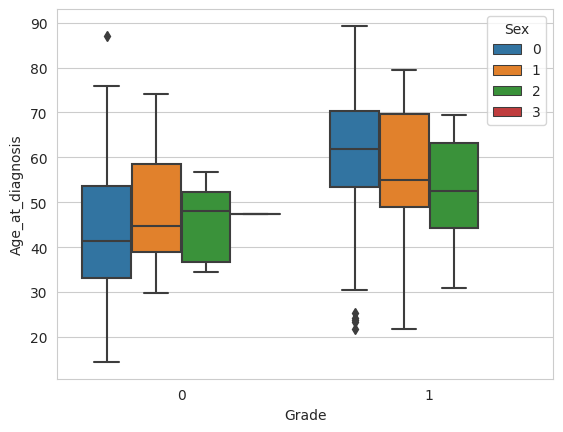

In [25]:
sns.set_style("whitegrid")

sns.boxplot(x='Grade',y='Age_at_diagnosis',hue='Sex', data=df)

---
**Q4: Is there a difference in age at diagnosis based on the patient's race? (5 points numerical answer + 5 points graphical answer)**

---
**Q5: Among the five mentioned genes, which one is more frequently mutated in each glioma grade? (5 points numerical  + 5 points graphical answer)**

---
**Q6: Do mutation frequencies of the mentioned genes vary according to the patient's race? (5 points numerical answer + 5 points graphical answer)**

---
**Q7: In individual patients, who has the highest number of mutations across all the mentioned genes? (5 *bonus* points numerical answer)**